In [26]:
!pip install -U scikit-learn

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Monster\\Anaconda3\\envs\\tf-gpu\\Lib\\site-packages\\~klearn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



  Using cached scikit_learn-1.0.2-cp39-cp39-win_amd64.whl (7.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [2]:
df = pd.read_csv('training_set.csv')
df.head(2)

,label,cleaned_article,num_punctuations,no_of_stopwords,no_of_quesMarks,no_of_exclamation,no_of_sentence,sentiment,cc_cd,determiner,...,noun,adverb,verb,article_len,negations,polarity,word_count,avg_word_len,num_unique_words,num_chars
0,1,seeking best woman final return fridaysunday y...,139,634,5,0,41,Positive,37,98,...,236,27,150,4563,6,0.049887,357,6.392157,234,2638
1,0,harsh reality come taking responsibility life ...,112,702,2,3,37,Positive,53,79,...,196,85,230,5470,15,0.029320,347,6.573487,263,2627


In [3]:
# Sentiment is a categorical data, we have to encode it for model training
from sklearn.preprocessing import OneHotEncoder
def Encoding_sentiment(df):
    encoder = OneHotEncoder(drop = 'first') # Creating object of OneHotEncoder class
    encoded_sentiment = encoder.fit_transform(pd.DataFrame(df['sentiment'])).toarray().astype(int) # Fitting to the data
    column_names = encoder.get_feature_names_out() # Getting feature name
    encoded_sentiment = pd.DataFrame(encoded_sentiment, columns = column_names)  # Creating dataframe of encoded feature
    df = pd.concat([df, encoded_sentiment], axis = 1) # Concatinating newly created sentiment dataframe into original dataframe
    df.drop('sentiment', axis = 1, inplace = True) # dropping sentiment column as I have already encoded this categorical feature
    return df

In [4]:
df = Encoding_sentiment(df) # Calling the function to encode Sentiment column which is a categorial feature

In [5]:
#num_fea = df.drop(['cleaned_article', 'label'], axis = 1).values # Training features
#y = df['label'].values # Target variable

In [6]:
X = df['cleaned_article']
y = df['label']

## Test Set 1

In [7]:
# Importing testing dataset 1
test_df1 = pd.read_csv('Test/test1.csv') 
test_df1 = Encoding_sentiment(test_df1) # Encoding categorical features
test_df1.drop(index = list(test_df1[test_df1['word_count']==0].index),inplace = True, axis = 0) # dropping all those rows which have word count zero in other words rows which have empty article
test1_num = test_df1.drop(['cleaned_article','label'], axis = 1).values # Testing features
label_y1 = test_df1['label'].values # Testing labels
#test1_num = sc.transform(test1_num) # scaling features

## Test Set 2

In [8]:
# Importing testing dataset 2
test_df2 = pd.read_csv('Test/test2.csv')
test_df2 = Encoding_sentiment(test_df2)
test_df2.drop(index = list(test_df2[test_df2['word_count']==0].index),inplace = True, axis = 0)
test2_num = test_df2.drop(['cleaned_article','label'], axis = 1).values
test_df2.dropna(inplace = True)
label_y2 = test_df2['label'].values
#test2_num = sc.transform(test2_num)

## Count Vectorization

In [9]:
# Creating train and test data for model training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis = 1), df['label'], test_size=0.2, random_state=20)

In [10]:
# Fiting vectorizer on training dataset

vectorizer = CountVectorizer()
vectorizer.fit(df['cleaned_article']) # trump : 1

CountVectorizer()

In [11]:
import pickle
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

In [12]:
# Transforming 
train_vec = vectorizer.transform(X_train.cleaned_article)
test_vec = vectorizer.transform(X_test.cleaned_article)

In [13]:
test_set1_vec = vectorizer.transform(test_df1['cleaned_article'])
test_set2_vec = vectorizer.transform(test_df2['cleaned_article'])

## Logistic Regression

<AxesSubplot:>

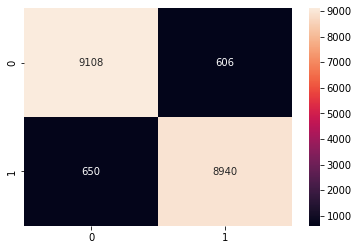

In [20]:
log_cls = LogisticRegression(penalty='l2', max_iter=500, solver = 'liblinear') # creating class object
log_cls.fit(train_vec, y_train) # fitting to the training set

log_ypred = log_cls.predict(test_vec) # predicting on testset

# Ploting Confusion Matrix
cm = confusion_matrix(y_test, log_ypred)
sn.heatmap(cm, annot=True, fmt="d")

In [21]:
print(classification_report(y_test, log_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.9334    0.9376    0.9355      9714
           1     0.9365    0.9322    0.9344      9590

    accuracy                         0.9349     19304
   macro avg     0.9350    0.9349    0.9349     19304
weighted avg     0.9349    0.9349    0.9349     19304



In [22]:
# Predicting on first test set
test1_log_ypred = log_cls.predict(test_set1_vec)
print(classification_report(label_y1, test1_log_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6565    0.6037    0.6290      2846
           1     0.5604    0.6153    0.5866      2337

    accuracy                         0.6089      5183
   macro avg     0.6084    0.6095    0.6078      5183
weighted avg     0.6132    0.6089    0.6098      5183



In [23]:
# Predicting on 2nd test set
test2_log_pred = log_cls.predict(test_set2_vec)
print(classification_report(label_y2, test2_log_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.6839    0.9757    0.8041      3164
           1     0.9577    0.5500    0.6987      3171

    accuracy                         0.7626      6335
   macro avg     0.8208    0.7628    0.7514      6335
weighted avg     0.8209    0.7626    0.7514      6335



In [24]:
import pickle
pickle.dump(log_cls, open("LR_model.pkl", "wb"))
pickle.dump(vectorizer, open("Count_vector.pkl", "wb"))

## KNN

<AxesSubplot:>

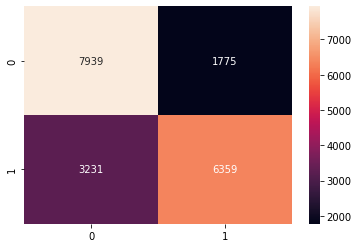

In [30]:
knn_cls = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
knn_cls.fit(train_vec, y_train)
knn_ypred = knn_cls.predict(test_vec)

cm = confusion_matrix(y_test, knn_ypred)
sn.heatmap(cm, annot=True, fmt="d")

In [31]:
# Classification report on train-test data
print(classification_report(y_test, knn_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.7107    0.8173    0.7603      9714
           1     0.7818    0.6631    0.7176      9590

    accuracy                         0.7407     19304
   macro avg     0.7463    0.7402    0.7389     19304
weighted avg     0.7460    0.7407    0.7391     19304



In [32]:
test1_knn_ypred = knn_cls.predict(test_set1_vec)
print(classification_report(label_y1, test1_knn_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6485    0.6989    0.6728      2846
           1     0.5950    0.5387    0.5655      2337

    accuracy                         0.6267      5183
   macro avg     0.6218    0.6188    0.6191      5183
weighted avg     0.6244    0.6267    0.6244      5183



In [33]:
test2_knn_ypred = knn_cls.predict(test_set2_vec)
print(classification_report(label_y2, test2_knn_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6626    0.8790    0.7556      3164
           1     0.8209    0.5535    0.6611      3171

    accuracy                         0.7160      6335
   macro avg     0.7417    0.7162    0.7084      6335
weighted avg     0.7418    0.7160    0.7083      6335



## Linear SVC

<AxesSubplot:>

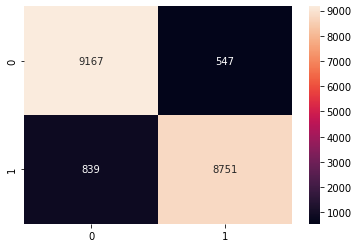

In [57]:
svm_clf = LinearSVC(max_iter = 2500, loss = 'squared_hinge', C = 0.01)
svm_clf.fit(train_vec, y_train)
svm_ypred = svm_clf.predict(test_vec)

cm = confusion_matrix(y_test, svm_ypred)
sn.heatmap(cm, annot=True, fmt="d")

In [58]:
print(classification_report(y_test, svm_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.9162    0.9437    0.9297      9714
           1     0.9412    0.9125    0.9266      9590

    accuracy                         0.9282     19304
   macro avg     0.9287    0.9281    0.9282     19304
weighted avg     0.9286    0.9282    0.9282     19304



In [59]:
test1_svc_ypred = svm_clf.predict(test_set1_vec)
print(classification_report(label_y1, test1_svc_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6634    0.6114    0.6363      2846
           1     0.5680    0.6222    0.5938      2337

    accuracy                         0.6162      5183
   macro avg     0.6157    0.6168    0.6151      5183
weighted avg     0.6203    0.6162    0.6172      5183



In [60]:
test2_svc_ypred = svm_clf.predict(test_set2_vec)
print(classification_report(label_y2, test2_svc_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6770    0.9766    0.7997      3164
           1     0.9582    0.5352    0.6868      3171

    accuracy                         0.7556      6335
   macro avg     0.8176    0.7559    0.7432      6335
weighted avg     0.8178    0.7556    0.7432      6335



## Passive Regressive

In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=2500)
pac.fit(train_vec, y_train)

#DataFlair - Predict on the test set and calculate accuracy
pac_ypred=pac.predict(test_vec)
score=accuracy_score(y_test,pac_ypred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 90.46%


In [41]:
print(classification_report(y_test, pac_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.9134    0.8952    0.9042      9714
           1     0.8960    0.9141    0.9049      9590

    accuracy                         0.9046     19304
   macro avg     0.9047    0.9046    0.9046     19304
weighted avg     0.9048    0.9046    0.9046     19304



In [42]:
test1_pac_ypred = pac.predict(test_set1_vec)
print(classification_report(label_y1, test1_pac_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6393    0.5611    0.5977      2846
           1     0.5348    0.6145    0.5719      2337

    accuracy                         0.5852      5183
   macro avg     0.5871    0.5878    0.5848      5183
weighted avg     0.5922    0.5852    0.5860      5183



In [43]:
test2_pac_ypred = pac.predict(test_set2_vec)
print(classification_report(label_y2, test2_pac_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.7149    0.9453    0.8141      3164
           1     0.9196    0.6238    0.7433      3171

    accuracy                         0.7844      6335
   macro avg     0.8172    0.7846    0.7787      6335
weighted avg     0.8173    0.7844    0.7787      6335



## Random Forest

<AxesSubplot:>

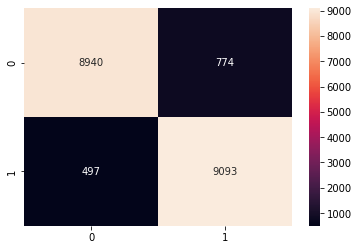

In [14]:
rand_forest_cls = RandomForestClassifier(n_estimators = 270, n_jobs = -1)
rand_forest_cls.fit(train_vec, y_train)
randForest_ypred = rand_forest_cls.predict(test_vec)

cm = confusion_matrix(y_test, randForest_ypred)
sn.heatmap(cm, annot=True, fmt="d")


In [15]:
print(classification_report(y_test, randForest_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.9473    0.9203    0.9336      9714
           1     0.9216    0.9482    0.9347      9590

    accuracy                         0.9342     19304
   macro avg     0.9344    0.9342    0.9342     19304
weighted avg     0.9345    0.9342    0.9342     19304



In [16]:
test1_rand_ypred = rand_forest_cls.predict(test_set1_vec)
print(classification_report(label_y1, test1_rand_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.7164    0.5903    0.6473      2846
           1     0.5891    0.7154    0.6462      2337

    accuracy                         0.6467      5183
   macro avg     0.6528    0.6529    0.6467      5183
weighted avg     0.6590    0.6467    0.6468      5183



In [17]:
test2_rand_ypred = rand_forest_cls.predict(test_set2_vec)
print(classification_report(label_y2, test2_rand_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.7726    0.9608    0.8565      3164
           1     0.9483    0.7178    0.8171      3171

    accuracy                         0.8391      6335
   macro avg     0.8604    0.8393    0.8368      6335
weighted avg     0.8605    0.8391    0.8368      6335



In [19]:
import pickle
pickle.dump(rand_forest_cls, open("RF_model.pkl", "wb"))
pickle.dump(vectorizer, open("Count_vector.pkl", "wb"))

## Gradient Boosting

<AxesSubplot:>

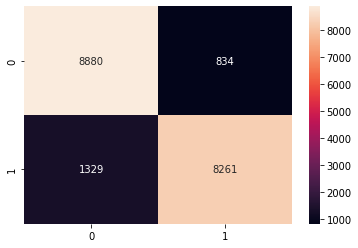

In [26]:
gb_clf = GradientBoostingClassifier(n_estimators=210, learning_rate=0.1)
gb_clf.fit(train_vec, y_train)
gb_ypred = gb_clf.predict(test_vec)

cm = confusion_matrix(y_test, gb_ypred)
sn.heatmap(cm, annot=True, fmt="d")

In [27]:
print(classification_report(y_test, gb_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.8698    0.9141    0.8914      9714
           1     0.9083    0.8614    0.8842      9590

    accuracy                         0.8880     19304
   macro avg     0.8891    0.8878    0.8878     19304
weighted avg     0.8889    0.8880    0.8879     19304



In [28]:
test1_gb_ypred = gb_clf.predict(test_set1_vec)
print(classification_report(label_y1, test1_gb_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6832    0.5871    0.6315      2846
           1     0.5707    0.6684    0.6157      2337

    accuracy                         0.6238      5183
   macro avg     0.6269    0.6278    0.6236      5183
weighted avg     0.6324    0.6238    0.6244      5183



In [29]:
test2_gb_ypred = gb_clf.predict(test_set2_vec)
print(classification_report(label_y2, test2_gb_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6517    0.9194    0.7627      3164
           1     0.8637    0.5096    0.6410      3171

    accuracy                         0.7143      6335
   macro avg     0.7577    0.7145    0.7019      6335
weighted avg     0.7578    0.7143    0.7018      6335



## XGBoost

[00:28:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

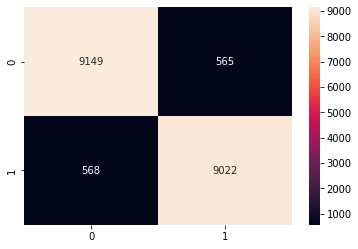

In [24]:
xgb1 = XGBClassifier(n_estimators = 150, gpu_id = 0, max_depth = 19, n_jobs = -1, tree_method='gpu_hist')

xgb1.fit(train_vec, y_train)
xgb_ypred = xgb1.predict(test_vec)

cm = confusion_matrix(y_test, xgb_ypred)
sn.heatmap(cm, annot=True, fmt="d")

In [21]:
print(classification_report(y_test, xgb_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.9053    0.9358    0.9203      9714
           1     0.9326    0.9008    0.9165      9590

    accuracy                         0.9184     19304
   macro avg     0.9190    0.9183    0.9184     19304
weighted avg     0.9189    0.9184    0.9184     19304



In [22]:
test1_xgb_ypred = xgb1.predict(test_set1_vec)
print(classification_report(label_y1, test1_xgb_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6876    0.6033    0.6427      2846
           1     0.5797    0.6662    0.6199      2337

    accuracy                         0.6317      5183
   macro avg     0.6336    0.6348    0.6313      5183
weighted avg     0.6389    0.6317    0.6324      5183



In [23]:
test2_xgb_ypred = xgb1.predict(test_set2_vec)
print(classification_report(label_y2, test2_xgb_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6520    0.9646    0.7781      3164
           1     0.9323    0.4863    0.6392      3171

    accuracy                         0.7252      6335
   macro avg     0.7921    0.7254    0.7086      6335
weighted avg     0.7923    0.7252    0.7085      6335



# Count Vector + Numeric Features

In [13]:
num_feature_xtrain = X_train.drop(['cleaned_article'], axis = 1).values # Training features
num_feature_xtest = X_test.drop(['cleaned_article'], axis = 1).values

In [14]:
# Scaling the data using Standard Scaler with mean = 0 and variance = 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(num_feature_xtrain)
num_feature_xtrain = sc.transform(num_feature_xtrain)

In [15]:
num_feature_xtest = sc.transform(num_feature_xtest)
test1_num = sc.transform(test1_num)
test2_num = sc.transform(test2_num)

In [17]:
from scipy.sparse import coo_matrix, hstack
cv_num_train = hstack([train_vec, num_feature_xtrain])
cv_num_test = hstack([test_vec, num_feature_xtest])

test1_cv_num = hstack([test_set1_vec, test1_num])
test2_cv_num = hstack([test_set2_vec, test2_num])


## Logistic Regression

<AxesSubplot:>

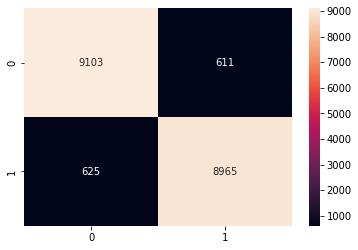

In [18]:
log_cvnum_cls = LogisticRegression(penalty='l2', max_iter=500, solver = 'liblinear') # creating class object
log_cvnum_cls.fit(cv_num_train, y_train) # fitting to the training set

log_cvnum_ypred = log_cvnum_cls.predict(cv_num_test) # predicting on testset

# Ploting Confusion Matrix
cm = confusion_matrix(y_test, log_cvnum_ypred)
sn.heatmap(cm, annot=True, fmt="d")

In [23]:
print(classification_report(log_cvnum_ypred, y_test, digits = 4))

              precision    recall  f1-score   support

           0     0.9371    0.9358    0.9364      9728
           1     0.9348    0.9362    0.9355      9576

    accuracy                         0.9360     19304
   macro avg     0.9360    0.9360    0.9360     19304
weighted avg     0.9360    0.9360    0.9360     19304



In [24]:
test1_cv_ypred = log_cvnum_cls.predict(test1_cv_num)
print(classification_report(label_y1, test1_cv_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6649    0.6079    0.6351      2846
           1     0.5676    0.6269    0.5958      2337

    accuracy                         0.6164      5183
   macro avg     0.6162    0.6174    0.6154      5183
weighted avg     0.6210    0.6164    0.6174      5183



In [25]:
test2_cv_ypred = log_cvnum_cls.predict(test2_cv_num)
print(classification_report(label_y2, test2_cv_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6850    0.9772    0.8054      3164
           1     0.9605    0.5516    0.7007      3171

    accuracy                         0.7642      6335
   macro avg     0.8227    0.7644    0.7531      6335
weighted avg     0.8229    0.7642    0.7530      6335



## KNN

<AxesSubplot:>

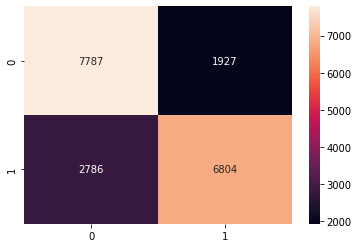

In [34]:
knn_cvnum_cls = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_cvnum_cls.fit(cv_num_train, y_train) # fitting to the training set

knn_cvnum_ypred = knn_cvnum_cls.predict(cv_num_test) # predicting on testset

# Ploting Confusion Matrix
cm = confusion_matrix(y_test, knn_cvnum_ypred)
sn.heatmap(cm, annot=True, fmt="d")

In [35]:
print(classification_report(y_test, knn_cvnum_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.7365    0.8016    0.7677      9714
           1     0.7793    0.7095    0.7428      9590

    accuracy                         0.7559     19304
   macro avg     0.7579    0.7556    0.7552     19304
weighted avg     0.7578    0.7559    0.7553     19304



In [36]:
# Predicting on first test set
test1_cvknn_ypred = knn_cvnum_cls.predict(test1_cv_num)
print(classification_report(label_y1, test1_cvknn_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6356    0.6644    0.6497      2846
           1     0.5675    0.5362    0.5514      2337

    accuracy                         0.6066      5183
   macro avg     0.6016    0.6003    0.6005      5183
weighted avg     0.6049    0.6066    0.6054      5183



In [37]:
# Predicting on 2nd test set
test2_cvknn_ypred = knn_cvnum_cls.predict(test2_cv_num)
print(classification_report(label_y2, test2_cvknn_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6648    0.8793    0.7571      3164
           1     0.8223    0.5576    0.6645      3171

    accuracy                         0.7182      6335
   macro avg     0.7435    0.7184    0.7108      6335
weighted avg     0.7436    0.7182    0.7108      6335



## Linear SVC

<AxesSubplot:>

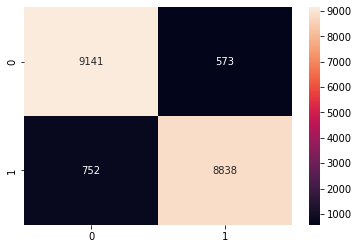

In [38]:
svc_cvnum_cls = LinearSVC(max_iter = 2500, loss = 'squared_hinge', C = 0.01) # creating class object
svc_cvnum_cls.fit(cv_num_train, y_train) # fitting to the training set

svc_cvnum_ypred = svc_cvnum_cls.predict(cv_num_test) # predicting on testset

# Ploting Confusion Matrix
cm = confusion_matrix(y_test, svc_cvnum_ypred)
sn.heatmap(cm, annot=True, fmt="d")

In [39]:
print(classification_report(y_test, svc_cvnum_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.9240    0.9410    0.9324      9714
           1     0.9391    0.9216    0.9303      9590

    accuracy                         0.9314     19304
   macro avg     0.9316    0.9313    0.9313     19304
weighted avg     0.9315    0.9314    0.9314     19304



In [40]:
# Predicting on first test set
test1_cvsvc_ypred = svc_cvnum_cls.predict(test1_cv_num)
print(classification_report(label_y1, test1_cvsvc_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6687    0.6121    0.6391      2846
           1     0.5718    0.6307    0.5998      2337

    accuracy                         0.6205      5183
   macro avg     0.6202    0.6214    0.6195      5183
weighted avg     0.6250    0.6205    0.6214      5183



In [41]:
# Predicting on 2nd test set
test2_cvsvc_ypred = svc_cvnum_cls.predict(test2_cv_num)
print(classification_report(label_y2, test2_cvsvc_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6801    0.9779    0.8023      3164
           1     0.9608    0.5412    0.6924      3171

    accuracy                         0.7593      6335
   macro avg     0.8205    0.7595    0.7473      6335
weighted avg     0.8206    0.7593    0.7473      6335



## Passive Aggressive

<AxesSubplot:>

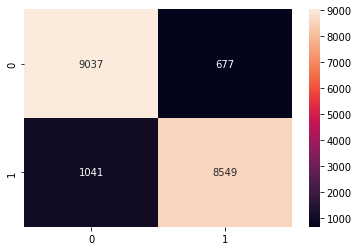

In [52]:
pac_cvnum_cls = PassiveAggressiveClassifier(max_iter=1000, C = 0.1, n_jobs=-1) # creating class object
pac_cvnum_cls.fit(cv_num_train, y_train) # fitting to the training set

pac_cvnum_ypred = pac_cvnum_cls.predict(cv_num_test) # predicting on testset

# Ploting Confusion Matrix
cm = confusion_matrix(y_test, pac_cvnum_ypred)
sn.heatmap(cm, annot=True, fmt="d")

In [53]:
print(classification_report(y_test, pac_cvnum_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.8967    0.9303    0.9132      9714
           1     0.9266    0.8914    0.9087      9590

    accuracy                         0.9110     19304
   macro avg     0.9117    0.9109    0.9109     19304
weighted avg     0.9116    0.9110    0.9110     19304



In [54]:
# Predicting on first test set
test1_cvpac_ypred = pac_cvnum_cls.predict(test1_cv_num)
print(classification_report(label_y1, test1_cvpac_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6505    0.5945    0.6213      2846
           1     0.5531    0.6110    0.5806      2337

    accuracy                         0.6020      5183
   macro avg     0.6018    0.6028    0.6009      5183
weighted avg     0.6066    0.6020    0.6029      5183



In [55]:
# Predicting on 2nd test set
test2_cvpac_ypred = pac_cvnum_cls.predict(test2_cv_num)
print(classification_report(label_y2, test2_cvpac_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6868    0.9618    0.8013      3164
           1     0.9364    0.5623    0.7027      3171

    accuracy                         0.7618      6335
   macro avg     0.8116    0.7620    0.7520      6335
weighted avg     0.8117    0.7618    0.7519      6335



## Random Forest

<AxesSubplot:>

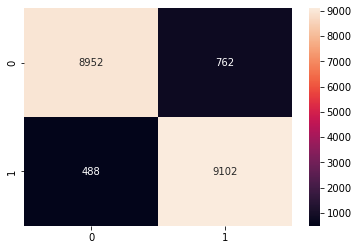

In [56]:
rand_cvnum_cls = RandomForestClassifier(n_estimators= 230, n_jobs = -1) # creating class object
rand_cvnum_cls.fit(cv_num_train, y_train) # fitting to the training set

rand_cvnum_ypred = rand_cvnum_cls.predict(cv_num_test) # predicting on testset

# Ploting Confusion Matrix
cm = confusion_matrix(y_test, rand_cvnum_ypred)
sn.heatmap(cm, annot=True, fmt="d")

In [57]:
print(classification_report(y_test, rand_cvnum_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.9483    0.9216    0.9347      9714
           1     0.9227    0.9491    0.9357      9590

    accuracy                         0.9352     19304
   macro avg     0.9355    0.9353    0.9352     19304
weighted avg     0.9356    0.9352    0.9352     19304



In [58]:
# Predicting on first test set
test1_cvrand_ypred = rand_cvnum_cls.predict(test1_cv_num)
print(classification_report(label_y1, test1_cvrand_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.7395    0.6103    0.6687      2846
           1     0.6087    0.7381    0.6672      2337

    accuracy                         0.6680      5183
   macro avg     0.6741    0.6742    0.6680      5183
weighted avg     0.6805    0.6680    0.6680      5183



In [59]:
# Predicting on 2nd test set
test2_cvrand_ypred = rand_cvnum_cls.predict(test2_cv_num)
print(classification_report(label_y2, test2_cvrand_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.7704    0.9576    0.8539      3164
           1     0.9442    0.7152    0.8139      3171

    accuracy                         0.8363      6335
   macro avg     0.8573    0.8364    0.8339      6335
weighted avg     0.8574    0.8363    0.8339      6335



## Gradient Boosting Classifier

<AxesSubplot:>

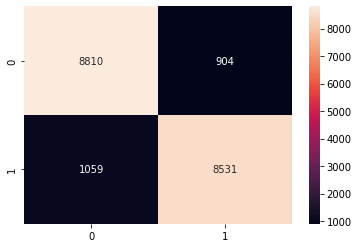

In [60]:
gb_cvnum_cls = GradientBoostingClassifier(n_estimators=190, learning_rate=0.1) # creating class object
gb_cvnum_cls.fit(cv_num_train, y_train) # fitting to the training set

gb_cvnum_ypred = gb_cvnum_cls.predict(cv_num_test) # predicting on testset

# Ploting Confusion Matrix
cm = confusion_matrix(y_test, gb_cvnum_ypred)
sn.heatmap(cm, annot=True, fmt="d")

In [61]:
print(classification_report(y_test, gb_cvnum_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.8927    0.9069    0.8998      9714
           1     0.9042    0.8896    0.8968      9590

    accuracy                         0.8983     19304
   macro avg     0.8984    0.8983    0.8983     19304
weighted avg     0.8984    0.8983    0.8983     19304



In [62]:
# Predicting on first test set
test1_cvgb_ypred = gb_cvnum_cls.predict(test1_cv_num)
print(classification_report(label_y1, test1_cvgb_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6926    0.5850    0.6343      2846
           1     0.5750    0.6838    0.6247      2337

    accuracy                         0.6296      5183
   macro avg     0.6338    0.6344    0.6295      5183
weighted avg     0.6396    0.6296    0.6300      5183



In [63]:
# Predicting on 2nd test set
test2_cvgb_ypred = gb_cvnum_cls.predict(test2_cv_num)
print(classification_report(label_y2, test2_cvgb_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6685    0.9115    0.7713      3164
           1     0.8615    0.5490    0.6706      3171

    accuracy                         0.7301      6335
   macro avg     0.7650    0.7303    0.7210      6335
weighted avg     0.7651    0.7301    0.7209      6335



## XGBoost

[17:32:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

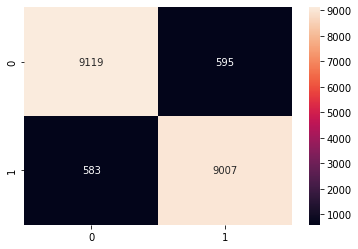

In [92]:
xgb_cvnum_cls = XGBClassifier(learning_rate = 1, tree_method = 'gpu_hist', gpu_id = 0, n_jobs = -1) # creating class object
xgb_cvnum_cls.fit(cv_num_train, y_train) # fitting to the training set

xgb_xgbnum_ypred = xgb_cvnum_cls.predict(cv_num_test) # predicting on testset

# Ploting Confusion Matrix
cm = confusion_matrix(y_test, xgb_xgbnum_ypred)
sn.heatmap(cm, annot=True, fmt="d")

In [93]:
print(classification_report(y_test, xgb_xgbnum_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.9399    0.9387    0.9393      9714
           1     0.9380    0.9392    0.9386      9590

    accuracy                         0.9390     19304
   macro avg     0.9390    0.9390    0.9390     19304
weighted avg     0.9390    0.9390    0.9390     19304



In [94]:
# Predicting on first test set
test1_cvxgb_ypred = xgb_cvnum_cls.predict(test1_cv_num)
print(classification_report(label_y1, test1_cvxgb_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6878    0.6068    0.6448      2846
           1     0.5812    0.6645    0.6201      2337

    accuracy                         0.6328      5183
   macro avg     0.6345    0.6357    0.6324      5183
weighted avg     0.6397    0.6328    0.6336      5183



In [95]:
# Predicting on 2nd test set
test2_cvxgb_ypred = xgb_cvnum_cls.predict(test2_cv_num)
print(classification_report(label_y2, test2_cvxgb_ypred, digits = 4))

              precision    recall  f1-score   support

           0     0.6785    0.9804    0.8020      3164
           1     0.9648    0.5364    0.6895      3171

    accuracy                         0.7582      6335
   macro avg     0.8217    0.7584    0.7457      6335
weighted avg     0.8218    0.7582    0.7457      6335

